In [1]:
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/7%20Evoluci%C3%B3n%20Diferencial/C%C3%B3digos/Plot_Contour.py'
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/7%20Evoluci%C3%B3n%20Diferencial/C%C3%B3digos/Plot_Surf.py'

import matplotlib.pyplot as plt
import numpy as np
from Plot_Surf import *
from Plot_Contour import *
from IPython import display

--2023-10-13 01:25:46--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/7%20Evoluci%C3%B3n%20Diferencial/C%C3%B3digos/Plot_Contour.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 649 [text/plain]
Saving to: ‘Plot_Contour.py’

Plot_Contour.py     100%[===================>]     649  --.-KB/s    in 0s      

2023-10-13 01:25:46 (38.5 MB/s) - ‘Plot_Contour.py’ saved [649/649]

--2023-10-13 01:25:46--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/7%20Evoluci%C3%B3n%20Diferencial/C%C3%B3digos/Plot_Surf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent

Función objetivo

In [12]:
#f = lambda x, y: (x-2)**2 + (y-2)**2
#f = lambda x, y: -20 * np.exp(-0.2 * np.sqrt(0.5*(x**2 + y**2))) - np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y))) + 20 + np.exp(1)
#f = lambda x, y: -((1+np.cos(12*np.sqrt(x**2+y**2))) / (0.5*(x**2+y**2)+2))
#f = lambda x, y: 10*2 + x**2 + y**2 - 10*np.cos(2*np.pi*x) - 10*np.cos(2*np.pi*y)
#f = lambda x, y: ((x**2/4000)+(y**2/4000))-(np.cos(x)*np.cos(y/np.sqrt(2)))+1
f = lambda x, y: (x**2)+(y**2)

Parámetros

In [13]:
xl = np.array([-5, -5])
xu = np.array([5, 5])

G = 30
N = 50
D = 2

F = 0.6
CR = 0.9

x = np.zeros((D, N))
fitness = np.zeros(N)

for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    fitness[i] = f(x[0, i], x[1, i])

fx_plot = np.zeros(G)

# DE

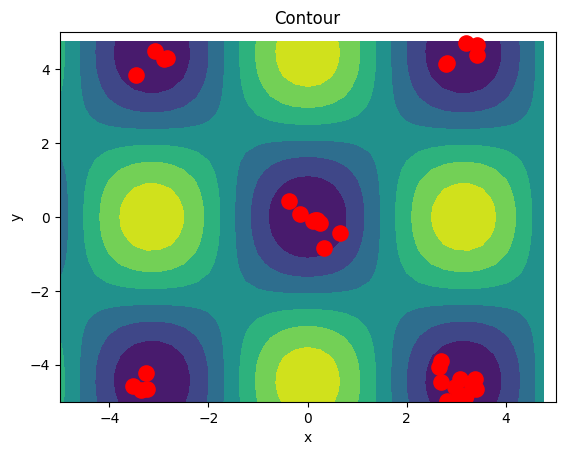

Mínimo global en x= 0.11662265249448653  y= -0.1056687237855285  f(x,y)= 0.009570127565002862


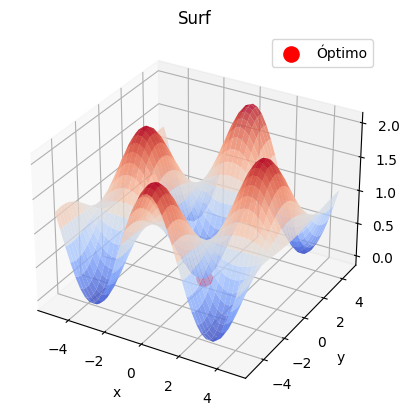

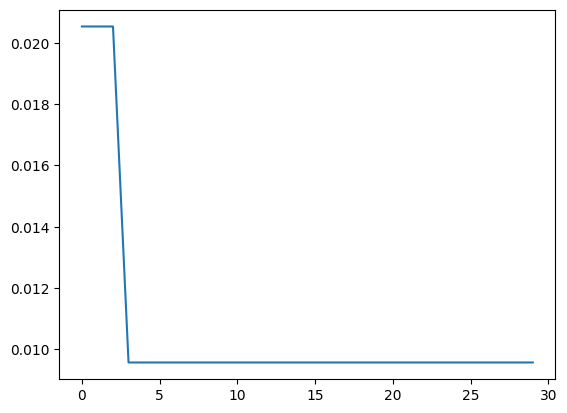

In [7]:
for n in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f, x, xl, xu)

    for i in range(N):
        # Mutación
        r1 = i
        while r1 == i:
            r1 = np.random.randint(N)

        r2 = r1
        while r2 == r1 or r2 == i:
            r2 = np.random.randint(N)

        r3 = r2
        while r3 == r2 or r3 == r1 or r3 == i:
            r3 = np.random.randint(N)

        v = x[:, r1] + F * (x[:, r2] - x[:, r3])

        # Recombinación
        u = np.zeros(D)

        for j in range(D):
            r = np.random.rand()

            if r <= CR:
                u[j] = v[j]
            else:
                u[j] = x[j, i]

        # Selección
        fitness_u = f(u[0], u[1])

        if fitness_u < fitness[i]:
            x[:,i] = u
            fitness[i] = fitness_u

    fx_plot[n] = np.min(fitness)

igb = np.argmin(fitness)

print("Mínimo global en x=", x[0, igb], " y=", x[1, igb], " f(x,y)=", f(x[0, igb], x[1, igb]))
plot_surf(f, x, xl, xu, igb)
plt.plot(fx_plot)

# DE Best 1 bin

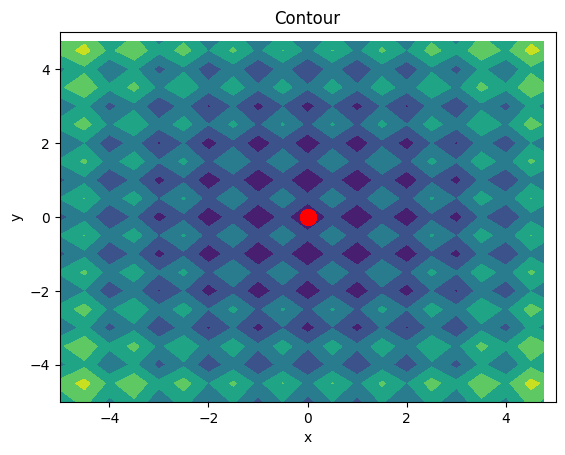

Mínimo global en x= 1.1752590418690672e-06  y= 4.6546057578013125e-06  f(x,y)= 4.572259015844793e-09


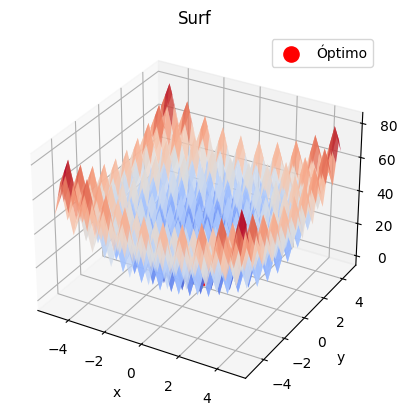

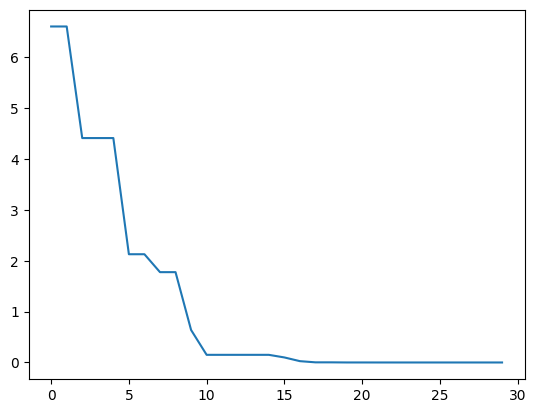

In [11]:
for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    fitness[i] = f(x[0, i], x[1, i])

fx_plot = np.zeros(G)

for n in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f, x, xl, xu)

    for i in range(N):
        # Mutación
        r1 = i
        while r1 == i:
            r1 = np.random.randint(N)

        r2 = r1
        while r2 == r1 or r2 == i:
            r2 = np.random.randint(N)

        best = np.argmin(fitness)

        v = x[:, best] + F * (x[:, r1] - x[:, r2])

        #Recombinación
        u = np.zeros(D)
        k = np.random.randint(D)

        for j in range(D):
            r = np.random.rand()

            if r <= CR or j == k:
                u[j] = v[j]
            else:
                u[j] = x[j, i]

        #Selección
        fitness_u = f(u[0], u[1])

        if fitness_u < fitness[i]:
            x[:, i] = u
            fitness[i] = fitness_u

    fx_plot[n] = np.min(fitness)

igb = np.argmin(fitness)

print("Mínimo global en x=", x[0, igb], " y=", x[1, igb], " f(x,y)=", f(x[0, igb], x[1, igb]))
plot_surf(f, x, xl, xu, igb)
plt.plot(fx_plot)

# DE Current to Rand 1 exp

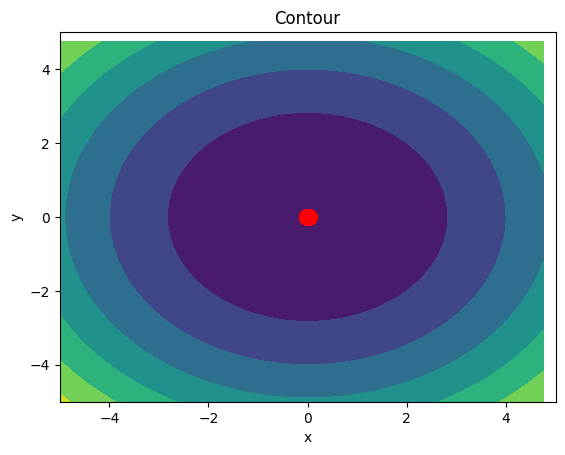

Mínimo global en x= 0.00015263975459481327  y= -0.0006122086230427467  f(x,y)= 3.980982928106607e-07


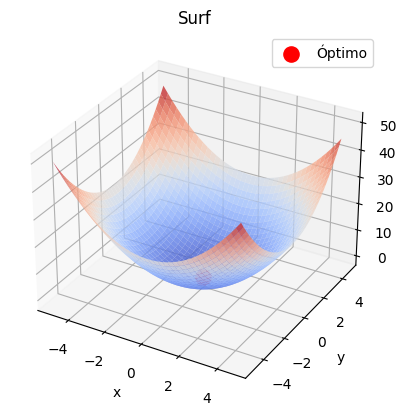

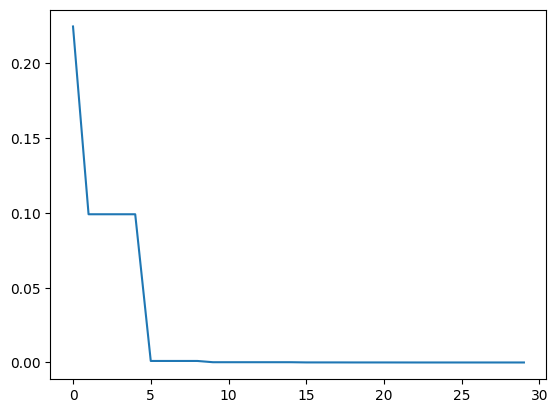

In [14]:
for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    fitness[i] = f(x[0, i], x[1, i])

fx_plot = np.zeros(G)

for n in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f, x, xl, xu)

    for i in range(N):
        # Mutación
        r1 = i
        while r1 == i:
            r1 = np.random.randint(N)

        r2 = r1
        while r2 == r1 or r2 == i:
            r2 = np.random.randint(N)

        r3 = r2
        while r3 == r2 or r3 == r1 or r3 == i:
            r3 = np.random.randint(N)

        v = x[:, i] + F * (x[:, r1] - x[:, i]) + F * (x[:, r2] - x[:, r3])

        # Recombinación
        u = x[:, i].copy() # vector de prueba
        j = np.random.randint(D)
        L = 1

        u[j] = v[j]
        while np.random.rand() <= CR and L < D:
            u[j] = v[j]
            j = np.mod(j, D)
            L = L + 1

        # Selección
        fitness_u = f(u[0], u[1])

        if fitness_u < fitness[i]:
            x[:, i] = u
            fitness[i] = fitness_u

    fx_plot[n] = np.min(fitness)

igb = np.argmin(fitness)

print("Mínimo global en x=", x[0, igb], " y=", x[1, igb], " f(x,y)=", f(x[0, igb], x[1, igb]))
plot_surf(f, x, xl, xu, igb)
plt.plot(fx_plot)